# **1.** Expore CH$_{4}$ Laboratory Spectra
***

## Table of Contents
* [**1.0** | Ensure Xpectra has been correctly installed](#1.0---Ensure-Xpectra-has-been-correctly-installed)
* [**1.1** | Load the laboratory spectra](#1.1---Import-CH4-lab-spectrum)
* [**1.2** | Check if there is any negative or NAN value](#1.2---Check-if-there-is-any-negative-or-NAN-value-in-the-data)
* [**1.3** | Visualize the spectra](#1.3---Visualize-the-spectrum)
* [**1.4** | Save it to the output directory](#1.4---Save-the-processed-spectra)

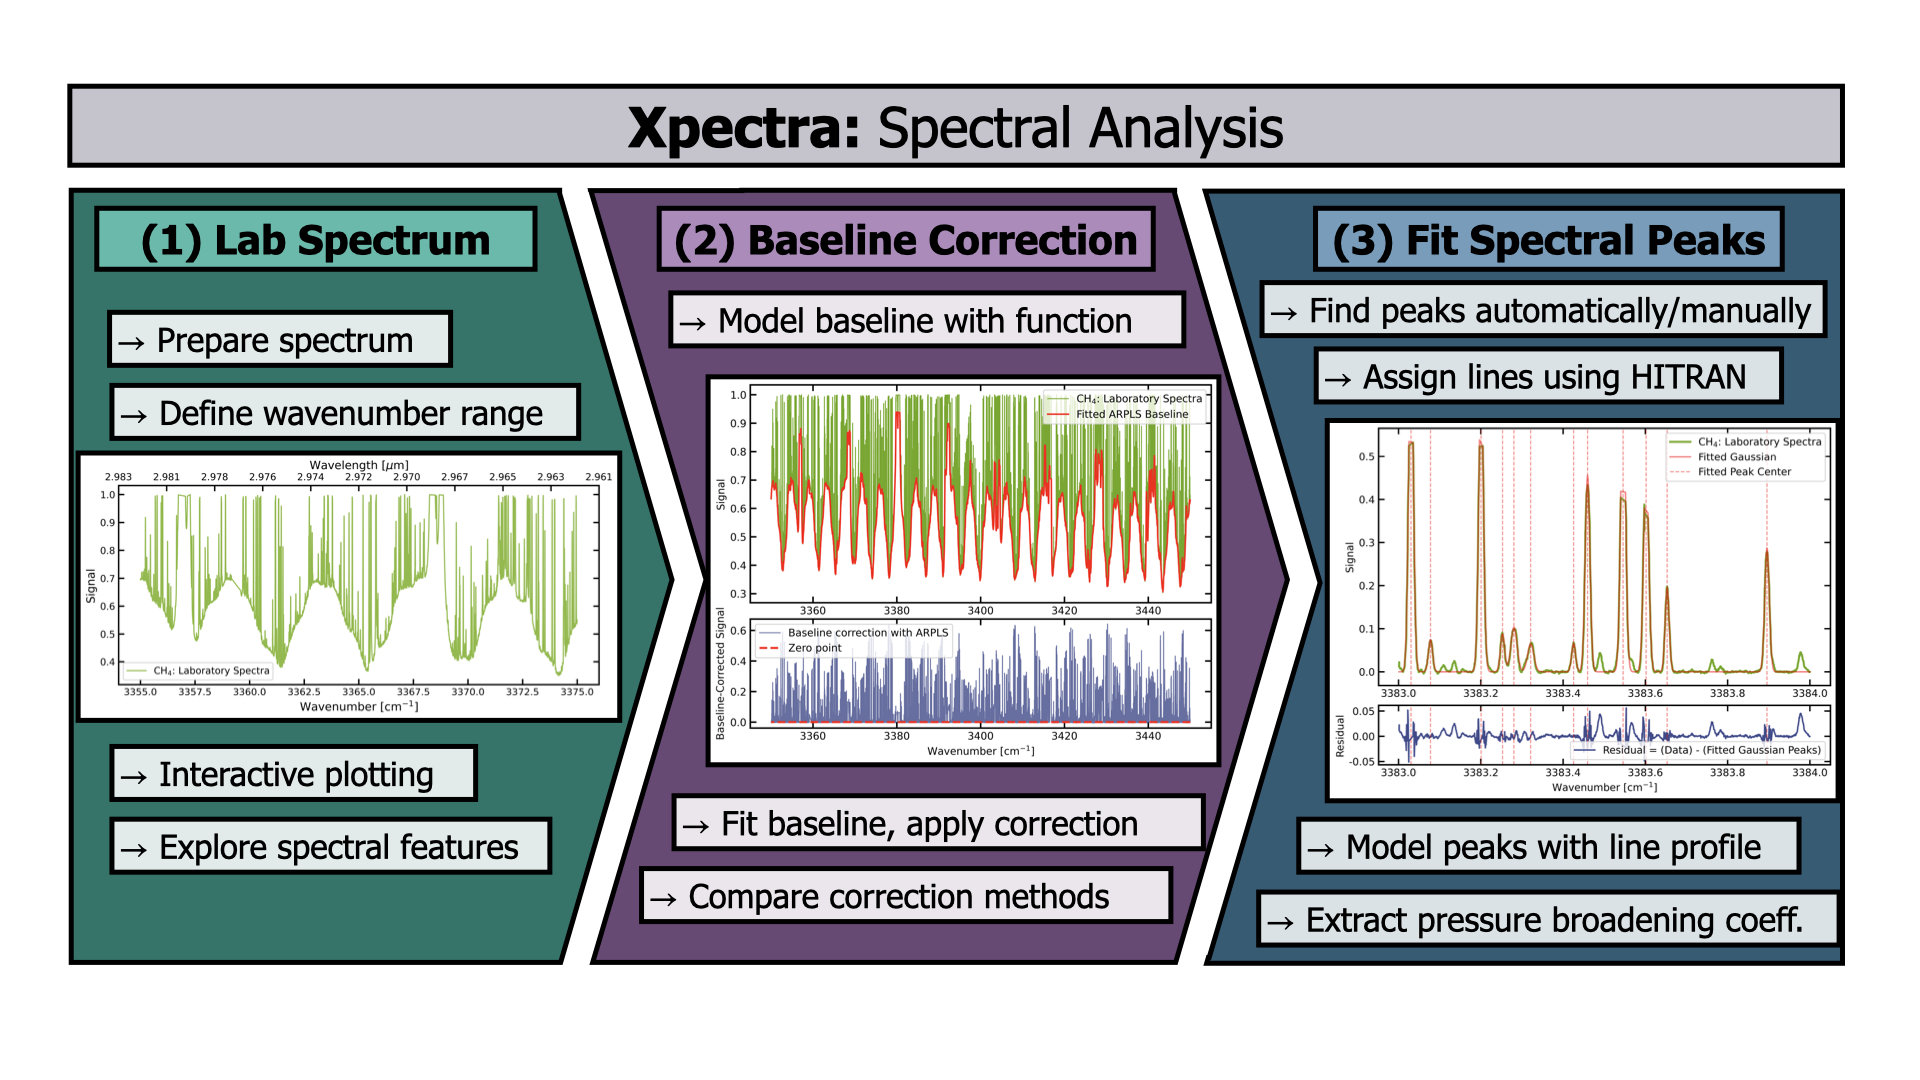

## **1.0** - Ensure Xpectra has been correctly installed
1. Created the *Xpectra_project* directory
2. Downloaded *reference_data* from [this link](https://www.google.com)
3. Put the datasets, figures, and tutorials/notebooks are in your *Xpectra_project/reference_data* directory.
4. Defined the path to your *reference_data*. Confirm it using `os.getenv("Xpectra_reference_data")`, but if you encounter an error, simply hard code it by defining the path as `__reference_data_path__`.
5. Cloned *Xpectra* using git clone `https://github.com/EhsanGharibNezhad/Xpectra.git`
6. Lastly, check you are able to execute `import Xpectra`



In [1]:
# Import necessary modules 
from Xpectra.SpecFitAnalyzer import *
from Xpectra.SpecStatVisualizer import print_spectral_info, plot_spectra_errorbar_seaborn

## **1.1** - Import CH4 lab spectrum

$\rightarrow$ After this setup, we can now import the $\mathrm{CH_{4}}$ spectrum as a DataFrame and seperate into two numpy arrays: x (wavenumber [$cm^{-1}$]) and y (signal).

In [2]:
# Call environment variable and assign path to data
__reference_data_path__ = os.getenv("Xpectra_reference_data")
print(__reference_data_path__)

/Users/familymader/Xpectra_project/reference_data


In [3]:
methane_spectrum = pd.read_csv(os.path.join(__reference_data_path__, 'datasets','Spectrum_CH4_100Torr.csv'))

# Create x and y arrays
x = 10**7/methane_spectrum['W'].to_numpy() # Convert wavelength to wavenumber
y = methane_spectrum['I'].to_numpy() # Intensity

## **1.2** - Check if there is any negative or NAN value in the data

Xpectra.SpecFitAnalyzer module has 3 essential purposes: process spectral data (current), fit and correct spectral baseline, and identify and fit spectral peaks. 

In [4]:
# Initialize SpecFitAnalyzer
specfit = SpecFitAnalyzer(wavenumber_values = x, signal_values = y)

$\rightarrow$ Scan arrays for negative or NAN values, print results, and save to class

In [5]:
# Check for NAN or negative values
specfit.check_negative_nan()

No NAN values.
9614 negative values found (7.78% of data)


$\rightarrow$ Values now saved as instance attributes: 

In [6]:
# Print attributes
print("x_cleaned:",specfit.x_cleaned)
print("y_cleaned:",specfit.y_cleaned)
print("negative_indeces:",specfit.negative_indeces)
print("nan_indeces:",specfit.nan_indeces)

x_cleaned: [2898.54306009 2898.54390792 2898.5447659  ... 2985.05887607 2985.05951532
 2985.0600492 ]
y_cleaned: [0.44029694 0.4364364  0.43730026 ... 0.45600653 0.45858333 0.45689613]
negative_indeces: [   193    194    195 ... 120542 120543 120544]
nan_indeces: []


In [7]:
# Convert spectra to absorption
y = np.exp(-y)

## **1.3** - Visualize the spectrum

$\rightarrow$ Print spectral information 

In [8]:
print_spectral_info(x, y, print_title='Methane Lab Spectrum')

******************************

Methane Lab Spectrum

{   'Number of points': 123527,
    'Wavenumber range (cm-1)': (   2898.5430600916807,
                                   2985.060049195717)}
******************************



$\rightarrow$ Plot spectrum using Seaborn, and save

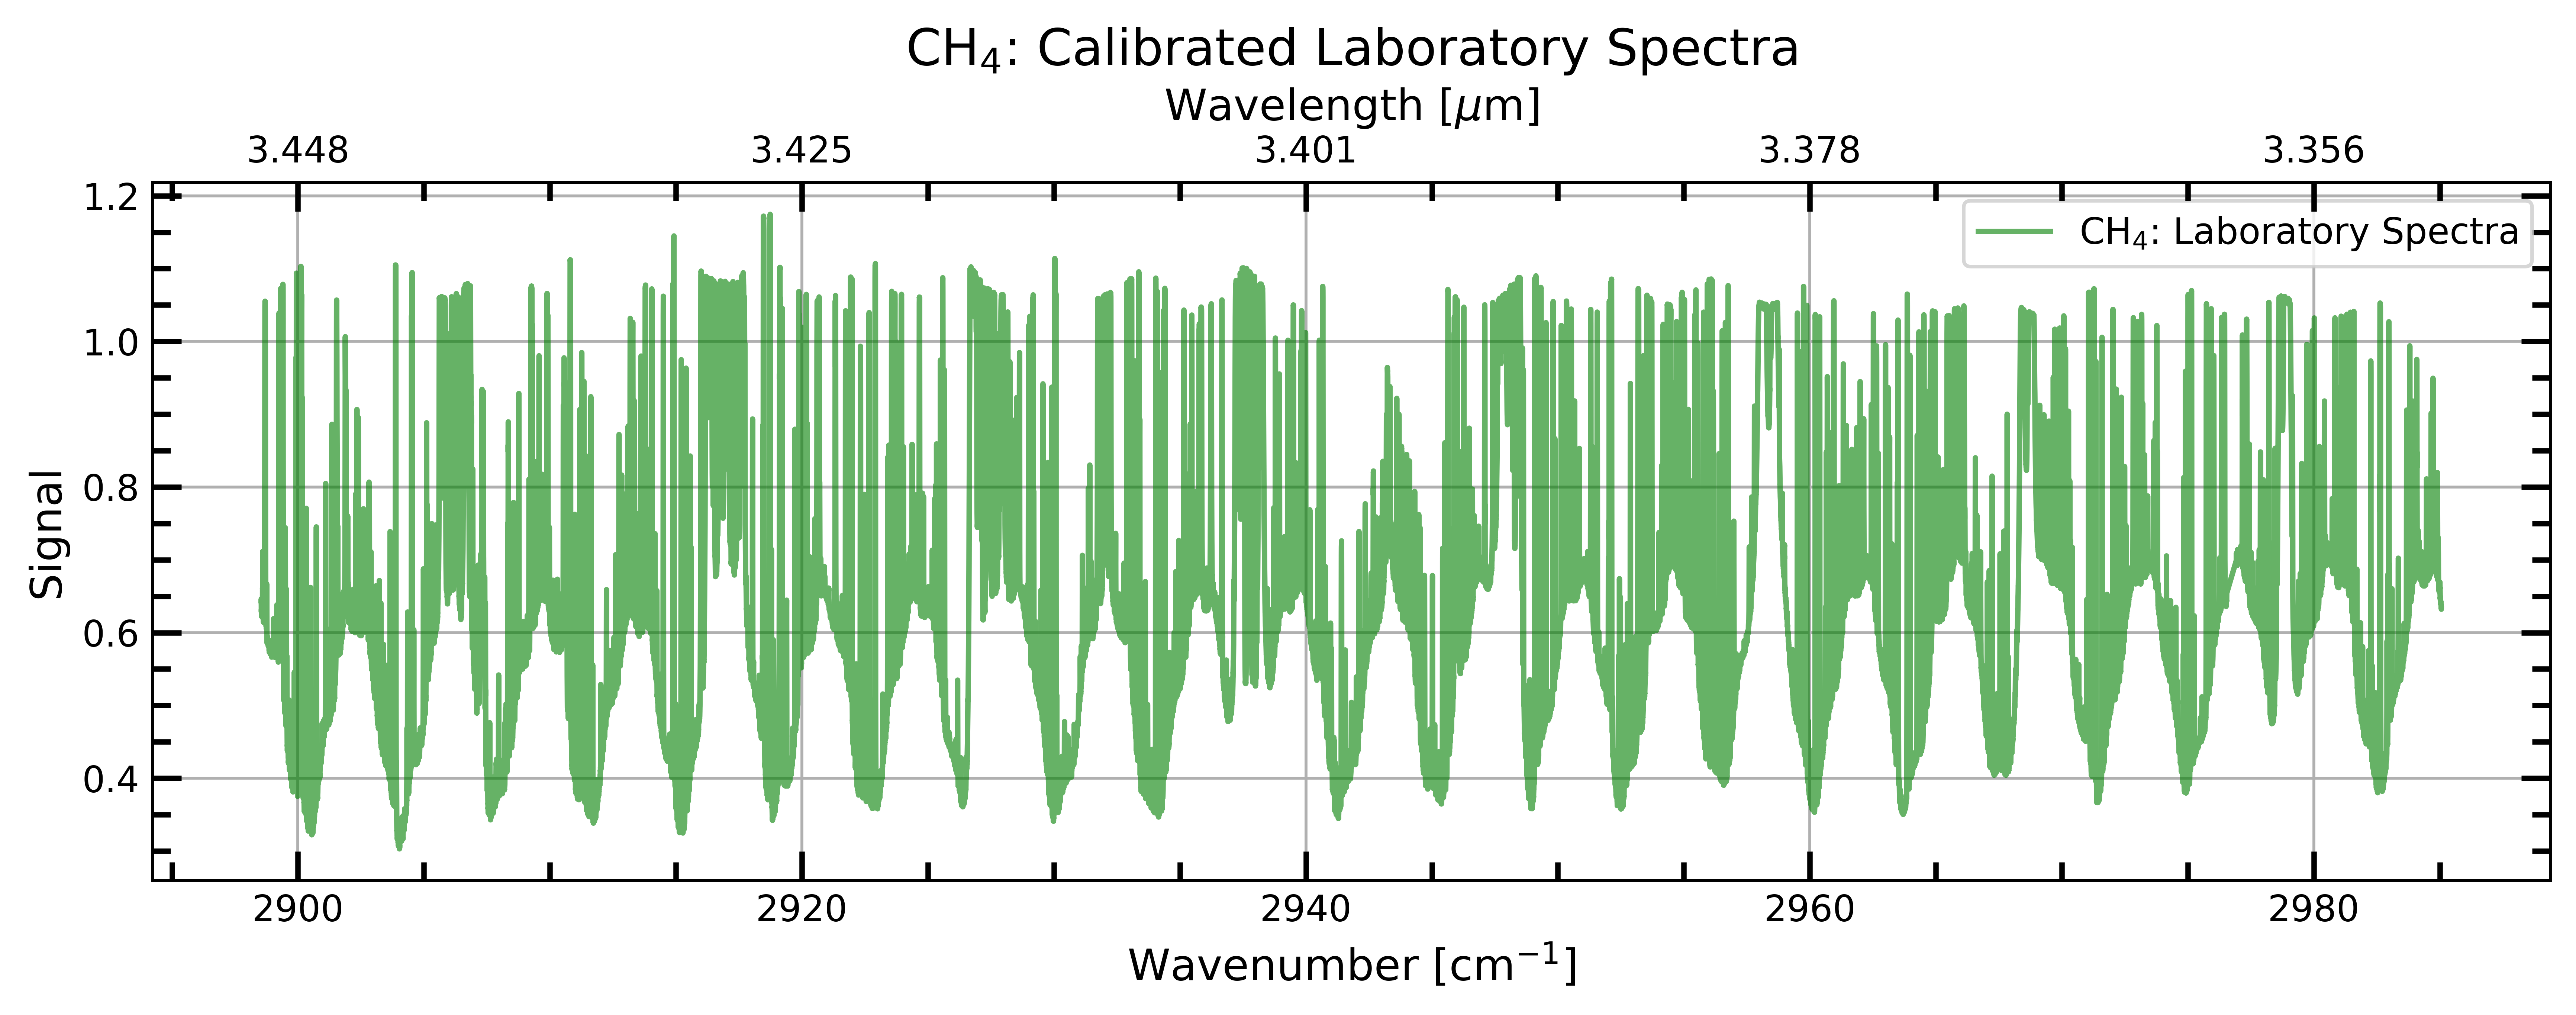

In [9]:
plot_spectra_errorbar_seaborn(wavenumber_values = x, 
                              signal_values = y,
                              __reference_data__ = __reference_data_path__, 
                              absorber_name = symbol_dict['CH4'],
                              plot_type = 'line',
                              __save_plots__ = True)

$\rightarrow$ Plot spectrum interactively using Bokeh, enabling zoom and panning

In [10]:
plot_spectra_errorbar_bokeh(wavenumber_values = x, 
                            signal_values = y,
                            absorber_name = 'CH4',
                            plot_type = 'line')

Loading BokehJS ...

## **1.4** - Save the processed spectra

$\rightarrow$ Create DataFrame with original and processed spectra

In [11]:
# Create DataFrame
data = {
    'original_x': x,
    'original_y': y,
    'cleaned_x': specfit.x_cleaned,
    'cleaned_y': specfit.y_cleaned
}

df = pd.DataFrame.from_dict(data, orient='index').transpose()

In [12]:
display(df)

original_x  original_y    cleaned_x  cleaned_y
0       2898.543060    0.643845  2898.543060   0.440297
1       2898.543908    0.646336  2898.543908   0.436436
2       2898.544766    0.645778  2898.544766   0.437300
3       2898.545133    0.639101  2898.545133   0.447693
4       2898.545638    0.630384  2898.545638   0.461426
...             ...         ...          ...        ...
123522  2985.057227    0.635260          NaN        NaN
123523  2985.058132    0.635798          NaN        NaN
123524  2985.058876    0.633810          NaN        NaN
123525  2985.059515    0.632179          NaN        NaN
123526  2985.060049    0.633246          NaN        NaN

[123527 rows x 4 columns]

$\rightarrow$ Save the spectra to CSV file

In [13]:
df.to_csv(os.path.join(__reference_data_path__,'processed_data','processed_methane_spectrum.csv'), index=False)